edited code from: http://m-clark.github.io/docs/IntroBayes.html#a_hands-on_example (original code in R)

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
drive = ['texting','texting','texting','not','not',
          'texting','texting','not','not','texting']

# convert to numeric, arbitrarily picking texting=1, not=0
driveNum = [1 if i=='texting' else 0 for i in drive]
N = len(drive)   # sample size
print("sample size = ", N)

nTexting = driveNum.count(1)      # number of drivers texting
print("number of texting = ", nTexting)

nNot = driveNum.count(0) # number of those not
print("number of NOT texting = ", nNot)

sample size =  10
number of texting =  6
number of NOT texting =  4


### Binomial Distribution

5.008  = mean with p=0.5


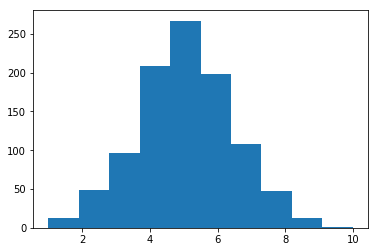

8.502  = mean with p=0.85


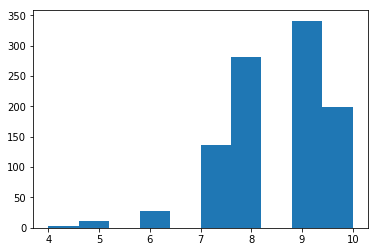

In [31]:
# Parameters:
# np.random.binomial(number of trials, probability of event, number of observations)

x1 = np.random.binomial(N, 0.5, 1000)
x2 = np.random.binomial(N, 0.85, 1000)

np.mean(x1)
print(np.mean(x1)," = mean with p=0.5")
plt.hist(x1) 
plt.show()

np.mean(x2)
print(np.mean(x2)," = mean with p=0.85")
plt.hist(x2)
plt.show()

#### possible probability (theta) values

In [32]:
theta = np.linspace(1/(N+1), N/(N+1), num=10)
theta

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091])

## Prior Distribution

In [33]:
# uniform
# pTheta = dunif(theta)

# triangular as in Kruschke
pTheta = np.maximum(theta, 1-theta)

# beta prior with mean = .5
# pTheta = dbeta(theta, 10, 10)

pTheta = pTheta/sum(pTheta) # Normalize so sum to 1
pTheta

array([0.125 , 0.1125, 0.1   , 0.0875, 0.075 , 0.075 , 0.0875, 0.1   ,
       0.1125, 0.125 ])

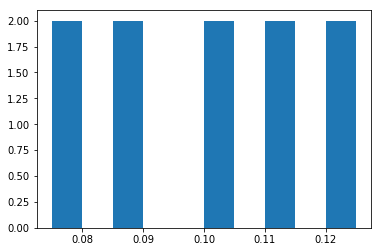

In [44]:
plt.hist(pTheta)
plt.show()

## Likelihood

In [34]:
from math import factorial

def calculate_combinations(n, r):
    return factorial(n) // factorial(r) // factorial(n-r)

In [49]:
pDataGivenTheta = calculate_combinations(N, nTexting) * theta**nTexting * (1-theta)**nNot
print("combinations: ",nCk(N, nTexting))
print("probability of data given theta: ", pDataGivenTheta)

combinations:  210
probability of data given theta:  [8.09640908e-05 3.39971456e-03 2.41757480e-02 7.96241027e-02
 1.63952284e-01 2.36091289e-01 2.43848814e-01 1.71916430e-01
 6.88442198e-02 8.09640908e-03]


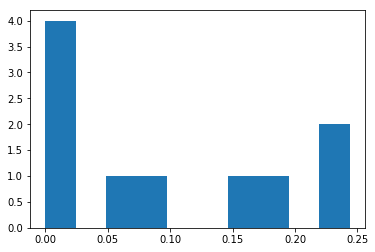

In [50]:
plt.hist(pDataGivenTheta)
plt.show()

## Posterior

In [53]:
# first we calculate the denominator from Bayes theorem; this is the marginal probability of y
pData = sum(pDataGivenTheta*pTheta)

pThetaGivenData = pDataGivenTheta*pTheta  / pData  # Bayes theorem

pThetaGivenData

array([1.16239561e-04, 4.39285111e-03, 2.77671576e-02, 8.00210250e-02,
       1.41231067e-01, 2.03372736e-01, 2.45064389e-01, 1.97455343e-01,
       8.89552349e-02, 1.16239561e-02])

## Visualizing the Data

In [54]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Round to the nea

In [70]:
theta1 = np.around(theta, decimals = 2)
pTheta1 = np.around(pTheta, decimals = 2)
pDataGivenTheta1 = np.around(pDataGivenTheta, decimals = 2)
pThetaGivenData1 = np.around(pThetaGivenData, decimals = 2)

In [76]:
d = {'theta' : theta1,'prior': pTheta1, 'likelihood': pDataGivenTheta1, 'posterior' : pThetaGivenData1}
pd.DataFrame(data=d)

,likelihood,posterior,prior,theta
0,0.00,0.00,0.12,0.09
1,0.00,0.00,0.11,0.18
2,0.02,0.03,0.10,0.27
3,0.08,0.08,0.09,0.36
4,0.16,0.14,0.08,0.45
5,0.24,0.20,0.07,0.55
6,0.24,0.25,0.09,0.64
7,0.17,0.20,0.10,0.73
8,0.07,0.09,0.11,0.82
9,0.01,0.01,0.12,0.91


## Conclusion

Using a uniform prior and the data provided, the model concluded that there is a 60% chance of someone texting while driving.

In [77]:
posteriorMean = sum(pThetaGivenData*theta)
posteriorMean

0.5988

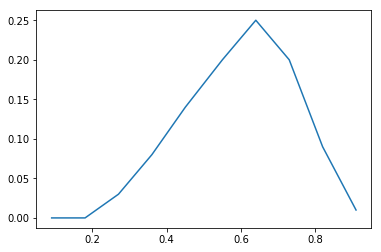

In [80]:
plt.plot(theta, pThetaGivenData)
plt.show()